<a href="https://colab.research.google.com/github/buskingsue/Machine_Learning/blob/main/ML02_K_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
iris_dataset = load_iris()
iris = pd.DataFrame(iris_dataset.data, columns=iris_dataset.feature_names)
labels = iris_dataset.target_names
iris.info()
iris.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris)
iris_scaled = pd.DataFrame(iris_scaled, columns=['sl', 'sw', 'pl', 'pw'])
iris_scaled.head()

,sl,sw,pl,pw
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [ ]:
target = iris_dataset.target
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(iris_scaled, target, test_size=0.2, random_state=85)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
accuracy_rate = []
for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn, x_train, y_train, cv=20)
    accuracy_rate.append(score.mean())

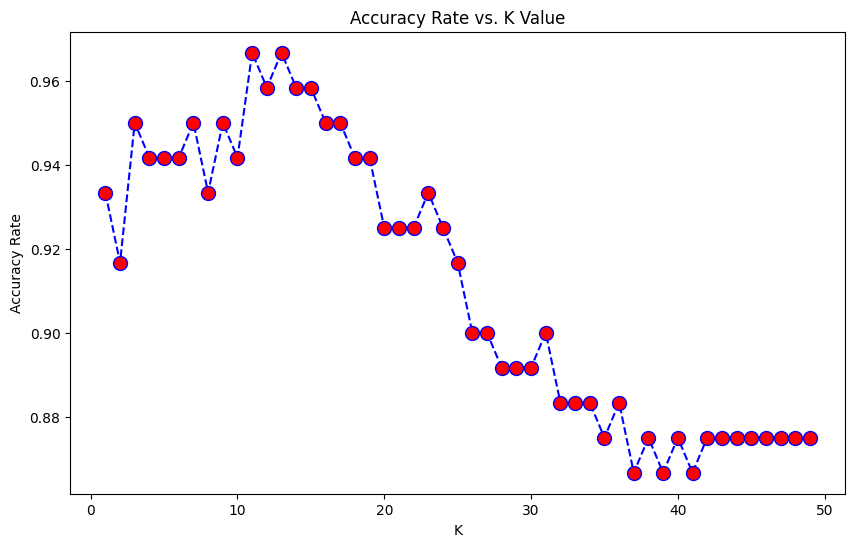

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 50), accuracy_rate, color='blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')
plt.show()

In [ ]:
for i in range(100):
    x_train, x_test, y_train, y_test = train_test_split(iris_scaled, target, test_size=0.2, random_state=i)
    iris_knn = KNeighborsClassifier(n_neighbors=13)
    iris_knn.fit(x_train, y_train)
    train_score = iris_knn.score(x_train, y_train)
    test_score = iris_knn.score(x_test, y_test)
    if test_score >= train_score:
        print('Test: {} Train: {} Random state: {}'.format(test_score, train_score, i))

Test: 1.0 Train: 0.9333333333333333 Random state: 0
Test: 0.9666666666666667 Train: 0.95 Random state: 1
Test: 0.9666666666666667 Train: 0.9583333333333334 Random state: 2
Test: 0.9666666666666667 Train: 0.9666666666666667 Random state: 3
Test: 1.0 Train: 0.9583333333333334 Random state: 9
Test: 0.9666666666666667 Train: 0.9583333333333334 Random state: 10
Test: 1.0 Train: 0.9666666666666667 Random state: 12
Test: 0.9666666666666667 Train: 0.9666666666666667 Random state: 13
Test: 0.9666666666666667 Train: 0.9666666666666667 Random state: 14
Test: 1.0 Train: 0.9583333333333334 Random state: 15
Test: 1.0 Train: 0.9583333333333334 Random state: 18
Test: 1.0 Train: 0.95 Random state: 19
Test: 0.9666666666666667 Train: 0.9583333333333334 Random state: 22
Test: 1.0 Train: 0.9666666666666667 Random state: 24
Test: 0.9666666666666667 Train: 0.9666666666666667 Random state: 26
Test: 1.0 Train: 0.9583333333333334 Random state: 28
Test: 1.0 Train: 0.9666666666666667 Random state: 32
Test: 0.9666

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(iris_scaled, target, test_size=0.2, random_state=85)
iris_knn = KNeighborsClassifier(n_neighbors=13)
iris_knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=13)

Text(0, 0.5, 'Petal Width [standardized]')

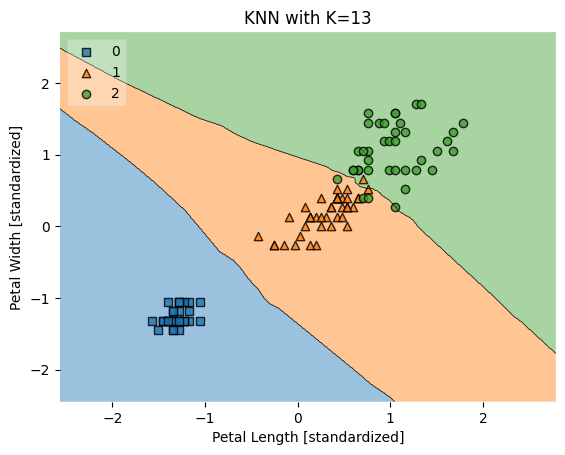

In [ ]:
from mlxtend.plotting import plot_decision_regions
x = np.array(x_train)[:, [2, 3]]
y = np.array(y_train)
iris_knn.fit(x, y)
fig = plot_decision_regions(x, y, clf=iris_knn, legend=2)
plt.title('KNN with K=13')
plt.xlabel('Petal Length [standardized]')
plt.ylabel('Petal Width [standardized]')

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
iris_knn.fit(x_train, y_train)
y_pred = iris_knn.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
pd.DataFrame(cm, columns=['pred setosa', 'pred versicolore', 'pred virginica'],
             index=labels)

,pred setosa,pred versicolore,pred virginica
setosa,11,0,0
versicolor,0,8,0
virginica,0,0,11


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

